In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /Users/vijaygirish/anaconda3/lib/python3.7/site-packages (1.5.0)
Requirement already up-to-date: torchvision==0.6 in /Users/vijaygirish/anaconda3/lib/python3.7/site-packages (0.6.0)
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
1.5.0 False
Configured with: --prefix=/Library/Developer/CommandLineTools/usr --with-gxx-include-dir=/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/c++/4.2.1
Apple clang version 11.0.0 (clang-1100.0.33.8)
Target: x86_64-apple-darwin19.5.0
Thread model: posix
InstalledDir: /Library/Developer/CommandLineTools/usr/bin


In [11]:
import sys
sys.path.append('../detectron2')
from pdf2image import convert_from_path

In [3]:
import detectron2
import torch, torchvision


In [4]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


In [5]:
import os
cwd = os.getcwd()
cwd

'/Users/vijaygirish/Downloads/Codes/bitbucket/resume_bounding_boxes'

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library

cfg.merge_from_file('DLA_mask_rcnn_R_50_FPN_3x.yaml')
#cfg.merge_from_file('./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = './model_final_trimmed.pth'
#cfg.MODEL.WEIGHTS = 'model_final_f10217.pkl'
cfg.MODEL.DEVICE = 'cpu'
predictor = DefaultPredictor(cfg)


WARNING [07/20 12:30:01 d2.config.compat]: Config 'DLA_mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [12]:

im = cv2.imread("./2019-07-18_07-35-18_087935_5e74bcff431f4585a801a2cf5a43c816.jpeg")
path = '../parseltongue-pkg/node_cont_resumes/424.pdf'
images = convert_from_path(path)
im = np.array(images[0])

outputs = predictor(im)



../torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [14]:
#['text', 'title', 'list', 'table', 'figure']
class_labels = ['text', 'title', 'list', 'table', 'figure']
MetadataCatalog.get("dla_val").thing_classes = ['text', 'title', 'list', 'table', 'figure']

outputs['instances'].pred_classes,outputs['instances'].pred_boxes

(tensor([2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1]),
 Boxes(tensor([[ 766.8663,  707.5930, 1516.9165, 1570.8646],
         [ 767.3710, 1792.7308, 1516.3909, 2190.9717],
         [  99.4571,  324.6525, 1469.0791,  429.6496],
         [ 903.6825, 1633.1793, 1156.7189, 1671.4249],
         [ 893.1989,  587.4944, 1312.3243,  666.5151],
         [ 115.6286,  874.5739,  239.4087,  923.3242],
         [ 867.0815,  547.1435, 1238.2878,  584.9713],
         [ 586.8492, 1637.2272,  707.0374, 1670.7328],
         [ 586.8785,  549.0267,  708.0284,  586.4573],
         [ 101.5255,  231.9235,  470.5705,  289.5010],
         [ 124.6585,  462.8410,  277.4445,  512.2921],
         [ 897.9746, 1671.4351, 1290.5416, 1752.9064],
         [ 139.4860, 1904.0063,  325.1321, 1938.3199],
         [ 102.9761,  148.1591,  715.0510,  219.5036],
         [ 167.6593,  949.5177,  526.2122, 1345.2594],
         [  97.8348,  328.0370, 1453.6481,  431.6201]])))

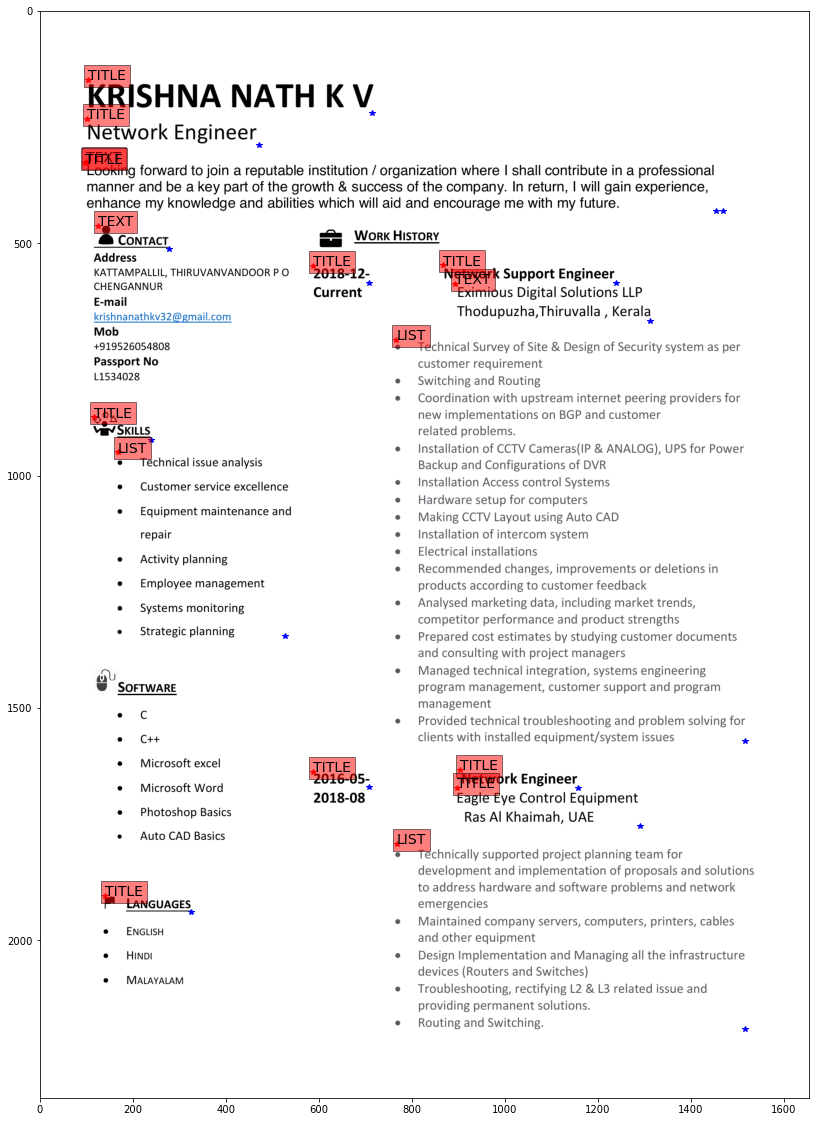

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (60,20))

for ind, bx in enumerate(outputs['instances'].pred_boxes):

    plt.plot( bx[0],  bx[1], 'r*')
    plt.plot( bx[2],  bx[3], 'b*')
    plt.text(bx[0],  bx[1],class_labels[outputs['instances'].pred_classes[ind] ].upper(),
             fontsize=14, bbox=dict(facecolor='red', alpha=0.5) )

plt.imshow(im)

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1],  MetadataCatalog.get("dla_val")
, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize = (60,20))

plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
plt.imshow(out.get_image())

In [ ]:
im
